In [1]:
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Titanic train.csv from Kaggle's dataset path
train_df = pd.read_csv(r'C:\Users\geeze\Downloads\Level_1\Task2_EDA\Level1_Task_2_titanic\train.csv')

print("First 5 rows of train_df:")
print(train_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nInformation about train_df (before cleaning):")
print(train_df.info())

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
    --------------------------------------- 0.3/15.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/15.5 MB 1.5 MB/s eta 0:00:10
   -- ------------------------------------- 1.0/15.5 MB 1.6 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/15.5 MB 1.9 MB/s eta 0:00:08
   ------ --------------------------------- 2.4/15.5 MB 2.1 MB/s eta 0:00:07
   ------- -------------------------------- 2.9/15.5 MB 2.2 MB/s eta 0:00:06
   -------- ------------------------------- 3.4/15.5 MB 2.2 MB/s eta 0:00:06
   ---------- ----------------------------- 3.9/15.5 MB 2.3 MB/s eta 0:00:05
   ------------ --------------------------- 4.7/15.5 MB 2.4 MB/s eta 0:00:05
   ------------- -------------------------- 5.2/15.5 MB 2.5 MB/s eta 0:00:05
   --------------- --------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is incompatible.


First 5 rows of train_df:
| PassengerId   | Survived   | Pclass   | Name                                                | Sex    | Age   | SibSp   | Parch   | Ticket           | Fare    | Cabin   | Embarked   |
|:--------------|:-----------|:---------|:----------------------------------------------------|:-------|:------|:--------|:--------|:-----------------|:--------|:--------|:-----------|
| 1             | 0          | 3        | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | A/5 21171        | 7.25    | nan     | S          |
| 2             | 1          | 1        | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | PC 17599         | 71.2833 | C85     | C          |
| 3             | 1          | 3        | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | STON/O2. 3101282 | 7.925   | nan     | S          |
| 4             | 1          | 1        | Futrell

In [2]:

# Handle missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


# Convert data types
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')

print("\nInformation about train_df (after cleaning):")
print(train_df.info())




Information about train_df (after cleaning):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB
None


In [3]:
# Summary statistics
print("\nSummary statistics for numerical columns:")
print(train_df.describe().to_markdown(numalign="left", stralign="left"))

print("\nValue counts for 'Sex':")
print(train_df['Sex'].value_counts().to_markdown(numalign="left", stralign="left"))

print("\nValue counts for 'Embarked':")
print(train_df['Embarked'].value_counts().to_markdown(numalign="left", stralign="left"))

print("\nValue counts for 'Pclass':")
print(train_df['Pclass'].value_counts().to_markdown(numalign="left", stralign="left"))




Summary statistics for numerical columns:
|       | PassengerId   | Survived   | Pclass   | Age     | SibSp    | Parch    | Fare    |
|:------|:--------------|:-----------|:---------|:--------|:---------|:---------|:--------|
| count | 891           | 891        | 891      | 891     | 891      | 891      | 891     |
| mean  | 446           | 0.383838   | 2.30864  | 29.3616 | 0.523008 | 0.381594 | 32.2042 |
| std   | 257.354       | 0.486592   | 0.836071 | 13.0197 | 1.10274  | 0.806057 | 49.6934 |
| min   | 1             | 0          | 1        | 0.42    | 0        | 0        | 0       |
| 25%   | 223.5         | 0          | 2        | 22      | 0        | 0        | 7.9104  |
| 50%   | 446           | 0          | 3        | 28      | 0        | 0        | 14.4542 |
| 75%   | 668.5         | 1          | 3        | 35      | 1        | 0        | 31      |
| max   | 891           | 1          | 3        | 80      | 8        | 6        | 512.329 |

Value counts for 'Sex':
| Sex    | c

In [4]:
# Group-based survival rates
survival_by_sex = train_df.groupby('Sex', observed=False)['Survived'].mean().reset_index()


print("\nSurvival rates by Sex:")
print(survival_by_sex.to_markdown(index=False, numalign="left", stralign="left"))

survival_by_pclass = train_df.groupby('Pclass', observed=False)['Survived'].mean().reset_index()

print("\nSurvival rates by Pclass:")
print(survival_by_pclass.to_markdown(index=False, numalign="left", stralign="left"))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




Survival rates by Sex:
| Sex    | Survived   |
|:-------|:-----------|
| female | 0.742038   |
| male   | 0.188908   |

Survival rates by Pclass:
| Pclass   | Survived   |
|:---------|:-----------|
| 1        | 0.62963    |
| 2        | 0.472826   |
| 3        | 0.242363   |


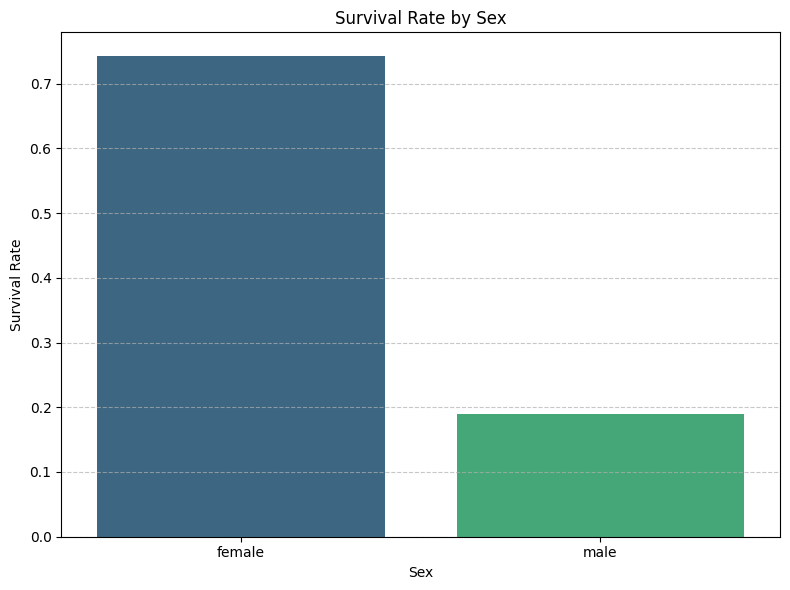

In [5]:
# Bar plot for survival rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_df, palette='viridis', estimator='mean', errorbar=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

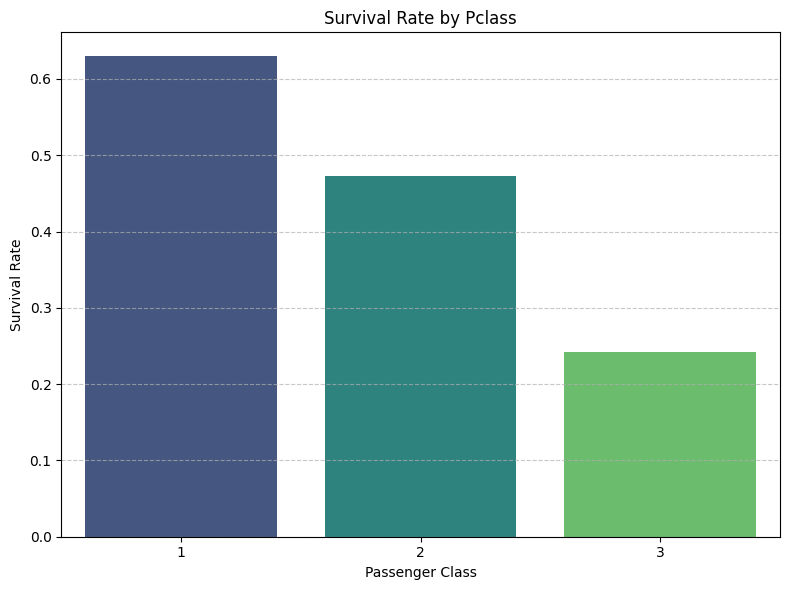

In [6]:
# Bar plot for survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='viridis', estimator='mean', errorbar=None)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

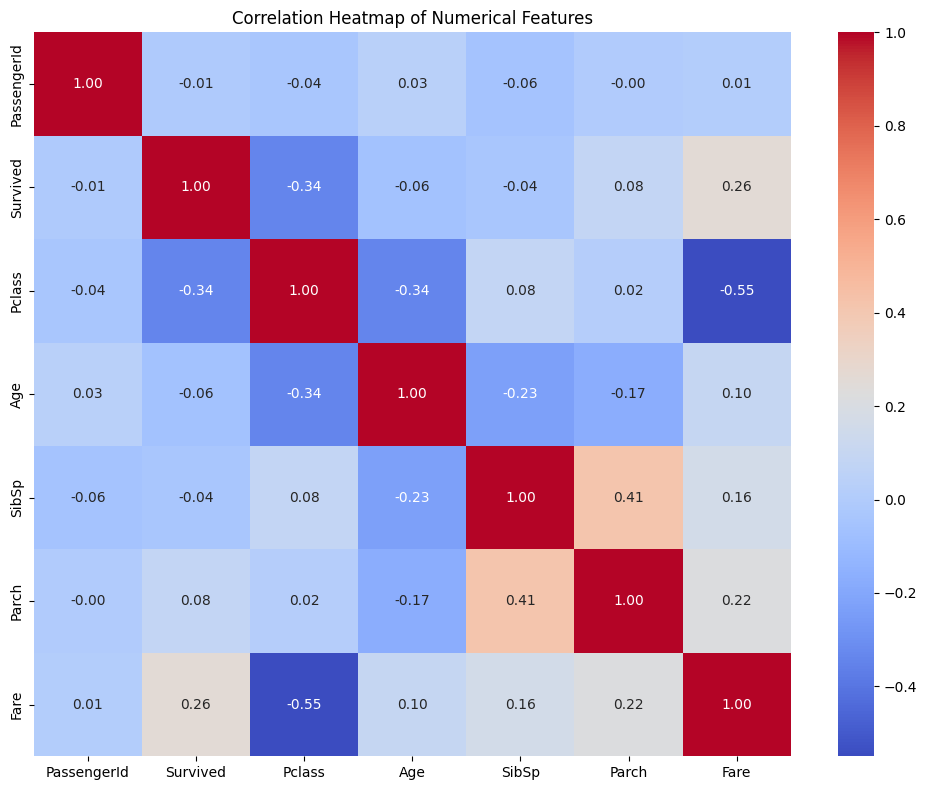

In [7]:

# Correlation heatmap
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()